In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import os
file_path = r"C:/Users/hp/Downloads/IRIS.csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
else:
    print("Error: File not found at", file_path)

File loaded successfully!


In [4]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 3


In [7]:
# Check for Class Imbalance
print("Class distribution:\n", df['species'].value_counts())

Class distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


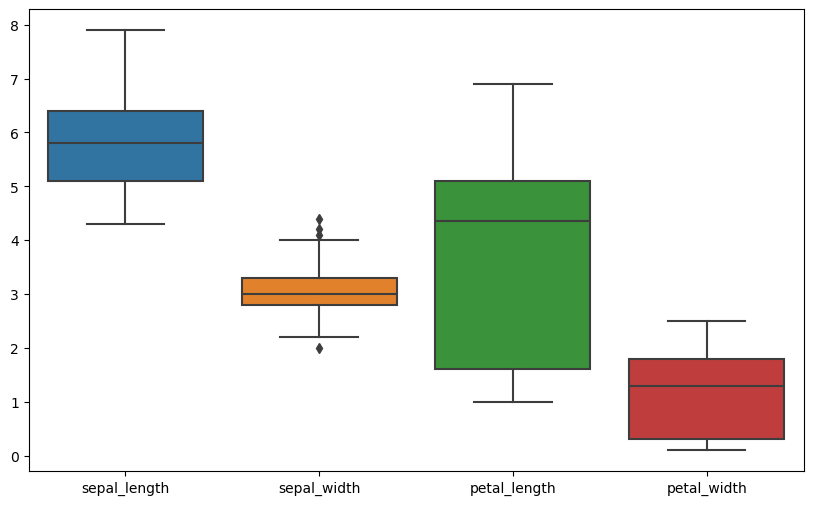

In [8]:
# Boxplot to check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['species']))
plt.show()

In [9]:
 #Removing Outliers using IQR Method
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]

# Print dataset shape after removing outliers
print("Dataset shape after outlier removal:", df.shape)

Dataset shape after outlier removal: (146, 5)


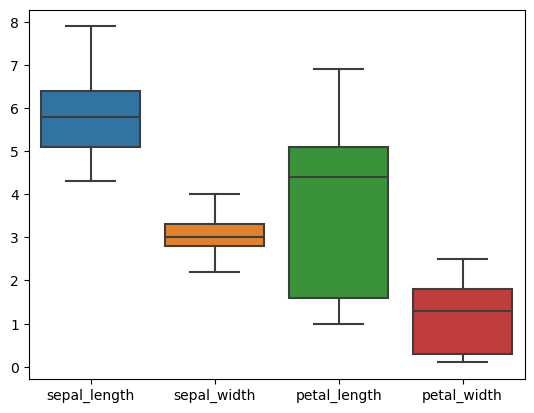

In [10]:
 #replot the boxplot to check if the extreme points are removed:
sns.boxplot(data=df.drop(columns=['species']))
plt.show()

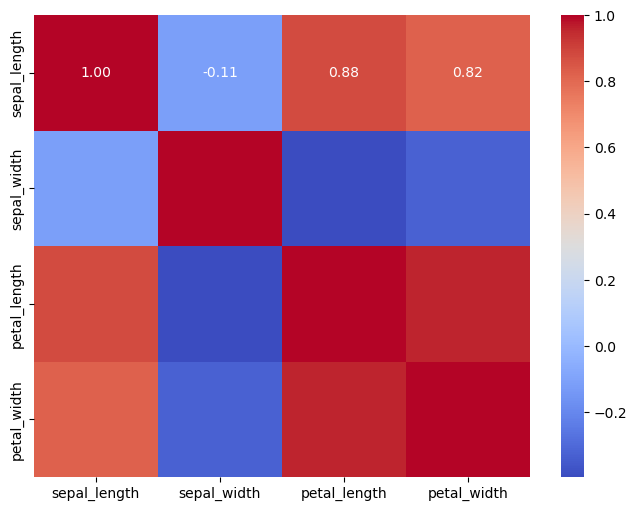

In [11]:
#Exclude the species column when computing correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (excluding the species column)
correlation_matrix = df.drop(columns=['species']).corr()

# Visualize correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [12]:
df.to_csv("cleaned_iris_dataset.csv", index=False)

Model Accuracy: 0.9333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



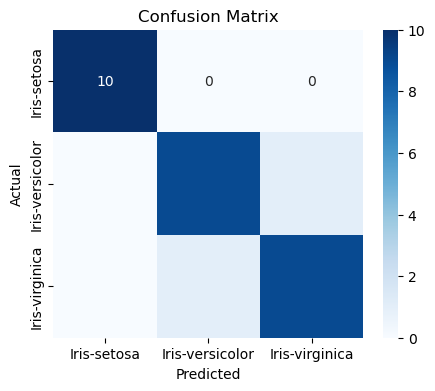

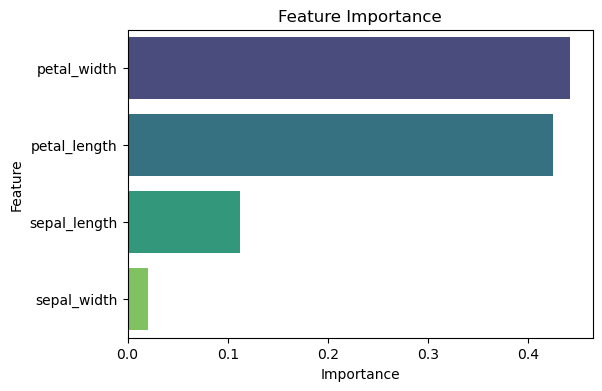

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_iris_dataset.csv")  # Ensure this file is correctly saved from previous steps

# Split features and labels
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target variable

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title("Feature Importance")
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.96666667 0.96551724 0.93103448 0.93103448 1.        ]
Mean accuracy: 0.9588505747126437


In [15]:
import joblib
joblib.dump(rf_model, "iris_model.pkl")  # Saves the trained model

['iris_model.pkl']

In [17]:
import pandas as pd

# Example feature names used during training
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Convert list to DataFrame with correct feature names
sample_df = pd.DataFrame(sample_inputs, columns=feature_names)

# Now predict
predictions = rf_model.predict(sample_df)
print("Predicted Classes:", predictions)


Predicted Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor']
